# Topics in social network analysis*
* Note: Code and analyses borrowed from https://www.analyticsvidhya.com/blog/2018/04/introduction-to-graph-theory-network-analysis-python-codes/

In [4]:
import networkx as nx

# Creating a Graph 
G = nx.Graph() # Right now G is empty

# Add a node
G.add_node(1) 
G.add_nodes_from([2,3]) # You can also add a list of nodes by passing a list argument

# Add edges 
G.add_edge(1,2)

G.edges()
e = (2,3)
G.add_edge(*e) # * unpacks the tuple
G.add_edges_from([(1,2), (1,3)]) # Just like nodes we can add edges from a list

In [ ]:
# Other means of generating graphs

#subgraph(G, nbunch)      - induced subgraph view of G on nodes in nbunch
#union(G1,G2)             - graph union
#disjoint_union(G1,G2)    - graph union assuming all nodes are different
#cartesian_product(G1,G2) - return Cartesian product graph
#compose(G1,G2)           - combine graphs identifying nodes common to both
#complement(G)            - graph complement
#create_empty_copy(G)     - return an empty copy of the same graph class
#convert_to_undirected(G) - return an undirected representation of G
#convert_to_directed(G)   - return a directed representation of G

## Accessing edges and nodes

Nodes and Edges can be accessed together using the G.nodes() and G.edges() methods. Individual nodes and edges can be accessed using the bracket/subscript notation.

In [5]:
G.nodes()

NodeView((1, 2, 3))

In [6]:
G.edges()

EdgeView([(1, 2), (1, 3), (2, 3)])

In [37]:
G[1] # same as G.adj[1]

AtlasView({2: {}, 3: {}})

In [38]:
G[1][2]

{}

In [39]:
G.edges[1, 2]

{}

# Graph visualization

/Users/jason/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


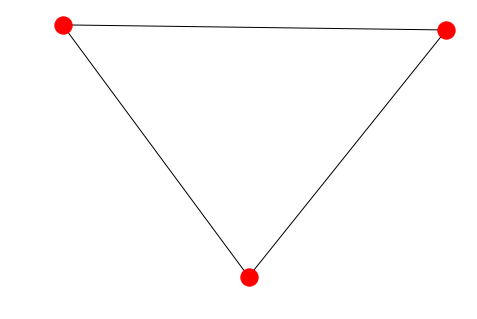

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
nx.draw(G)

In [11]:
# To install we do "conda install pygraphviz"

import pygraphviz as pgv
d={'1': {'2': None}, '2': {'1': None, '3': None}, '3': {'1': None}}
A = pgv.AGraph(data=d)
print(A)

strict graph "" {
	1 -- 2;
	2 -- 3;
	3 -- 1;
}



In [12]:
B = pgv.AGraph()
print(B)

strict graph "" {
}



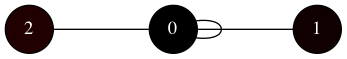

In [18]:
# Let us create another Graph where we can individually control the colour of each node
B = pgv.AGraph()

# Setting node attributes that are common for all nodes 
B.node_attr['style']='filled'
B.node_attr['shape']='circle'
B.node_attr['fixedsize']='true'
B.node_attr['fontcolor']='#ffffff' # Find colors here: https://www.color-hex.com/color-palettes/

# Creating and setting node attributes that vary for each node (using a for loop)
for i in range(3):
 B.add_edge(0,i)
 n=B.get_node(i)
 n.attr['fillcolor']="#%2x0000"%(i*16)
 #n.attr['height']="%s"%(i/16.0+0.5)
 #n.attr['width']="%s"%(i/16.0+0.5)
B.draw('star2.png',prog="circo") # This creates a .png file in the local directory. Displayed below.

from IPython.display import Image

Image('star2.png', width=650) # The Graph visualization we created above.

# Analysis on a dataset

In [19]:
import pandas as pd
import numpy as np

data = pd.read_csv('Airlines.csv')

In [20]:
data.shape
(100, 16)

data.dtypes

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
dtype: object

In [21]:
# converting sched_dep_time to 'std' - Scheduled time of departure
data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_dep_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

In [22]:
# converting sched_arr_time to 'sta' - Scheduled time of arrival
data['sta'] = data.sched_arr_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_arr_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

# converting dep_time to 'atd' - Actual time of departure
data['atd'] = data.dep_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.dep_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

In [23]:
# converting arr_time to 'ata' - Actual time of arrival
data['ata'] = data.arr_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.arr_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

In [24]:
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

In [25]:
# finally we drop the columns we don't need
data = data.drop(columns = ['year', 'month', 'day'])

In [26]:
data

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,std,sta,atd,ata,date
0,1807.0,1630,97.0,1956.0,1837,79.0,EV,4411,N13566,EWR,MEM,144.0,946,16:30:00,18:37:00,18:07:00,19:56:00,2013-02-26
1,1459.0,1445,14.0,1801.0,1747,14.0,B6,1171,N661JB,LGA,FLL,147.0,1076,14:45:00,17:47:00,14:59:00,18:01:00,2013-08-17
2,1812.0,1815,-3.0,2055.0,2125,-30.0,AS,7,N403AS,EWR,SEA,315.0,2402,18:15:00,21:25:00,18:12:00,20:55:00,2013-02-13
3,2122.0,2115,7.0,2339.0,2353,-14.0,B6,97,N656JB,JFK,DEN,221.0,1626,21:15:00,23:53:00,21:22:00,23:39:00,2013-04-11
4,1832.0,1835,-3.0,2145.0,2155,-10.0,AA,269,N3EYAA,JFK,SEA,358.0,2422,18:35:00,21:55:00,18:32:00,21:45:00,2013-08-05
5,1500.0,1505,-5.0,1751.0,1650,61.0,UA,685,N424UA,LGA,ORD,116.0,733,15:05:00,16:50:00,15:00:00,17:51:00,2013-06-30
6,1442.0,1445,-3.0,1833.0,1747,46.0,UA,346,N446UA,EWR,MIA,200.0,1085,14:45:00,17:47:00,14:42:00,18:33:00,2013-02-14
7,752.0,755,-3.0,1037.0,1057,-20.0,DL,2395,N909DL,LGA,PBI,140.0,1035,7:55:00,10:57:00,7:52:00,10:37:00,2013-07-25
8,557.0,600,-3.0,725.0,715,10.0,MQ,3267,N542MQ,EWR,ORD,113.0,719,6:00:00,7:15:00,5:57:00,7:25:00,2013-07-10
9,1907.0,1915,-8.0,2155.0,2219,-24.0,DL,2159,N909DE,JFK,MCO,138.0,944,19:15:00,22:19:00,19:07:00,21:55:00,2013-12-13


In [30]:
import networkx as nx
FG = nx.from_pandas_edgelist(data, source='origin', target='dest',edge_attr=True)
FG

In [31]:
FG.nodes()

NodeView(('EWR', 'MEM', 'LGA', 'FLL', 'SEA', 'JFK', 'DEN', 'ORD', 'MIA', 'PBI', 'MCO', 'CMH', 'MSP', 'IAD', 'CLT', 'TPA', 'DCA', 'SJU', 'ATL', 'BHM', 'SRQ', 'MSY', 'DTW', 'LAX', 'JAX', 'RDU', 'MDW', 'DFW', 'IAH', 'SFO', 'STL', 'CVG', 'IND', 'RSW', 'BOS', 'CLE'))

In [32]:
FG.edges()

EdgeView([('EWR', 'MEM'), ('EWR', 'SEA'), ('EWR', 'MIA'), ('EWR', 'ORD'), ('EWR', 'MSP'), ('EWR', 'TPA'), ('EWR', 'MSY'), ('EWR', 'DFW'), ('EWR', 'IAH'), ('EWR', 'SFO'), ('EWR', 'CVG'), ('EWR', 'IND'), ('EWR', 'RDU'), ('EWR', 'IAD'), ('EWR', 'RSW'), ('EWR', 'BOS'), ('EWR', 'PBI'), ('EWR', 'LAX'), ('EWR', 'MCO'), ('EWR', 'SJU'), ('LGA', 'FLL'), ('LGA', 'ORD'), ('LGA', 'PBI'), ('LGA', 'CMH'), ('LGA', 'IAD'), ('LGA', 'CLT'), ('LGA', 'MIA'), ('LGA', 'DCA'), ('LGA', 'BHM'), ('LGA', 'RDU'), ('LGA', 'ATL'), ('LGA', 'TPA'), ('LGA', 'MDW'), ('LGA', 'DEN'), ('LGA', 'MSP'), ('LGA', 'DTW'), ('LGA', 'STL'), ('LGA', 'MCO'), ('LGA', 'CVG'), ('LGA', 'IAH'), ('FLL', 'JFK'), ('SEA', 'JFK'), ('JFK', 'DEN'), ('JFK', 'MCO'), ('JFK', 'TPA'), ('JFK', 'SJU'), ('JFK', 'ATL'), ('JFK', 'SRQ'), ('JFK', 'DCA'), ('JFK', 'DTW'), ('JFK', 'LAX'), ('JFK', 'JAX'), ('JFK', 'CLT'), ('JFK', 'PBI'), ('JFK', 'CLE'), ('JFK', 'IAD'), ('JFK', 'BOS')])

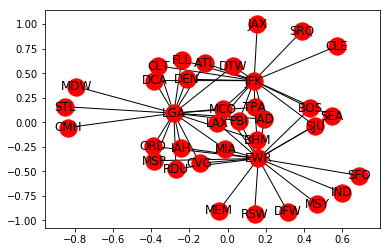

In [37]:
nx.draw_networkx(FG, with_labels=True,node_size=300) # Quick view of the Graph.

In [38]:
nx.algorithms.degree_centrality(FG) # Notice the 3 airports from which all of our 100 rows of data originates


#nx.density(FG) # Average edge density of the Graphs

{'EWR': 0.5714285714285714,
 'MEM': 0.02857142857142857,
 'LGA': 0.5714285714285714,
 'FLL': 0.05714285714285714,
 'SEA': 0.05714285714285714,
 'JFK': 0.4857142857142857,
 'DEN': 0.05714285714285714,
 'ORD': 0.05714285714285714,
 'MIA': 0.05714285714285714,
 'PBI': 0.08571428571428572,
 'MCO': 0.08571428571428572,
 'CMH': 0.02857142857142857,
 'MSP': 0.05714285714285714,
 'IAD': 0.08571428571428572,
 'CLT': 0.05714285714285714,
 'TPA': 0.08571428571428572,
 'DCA': 0.05714285714285714,
 'SJU': 0.05714285714285714,
 'ATL': 0.05714285714285714,
 'BHM': 0.02857142857142857,
 'SRQ': 0.02857142857142857,
 'MSY': 0.02857142857142857,
 'DTW': 0.05714285714285714,
 'LAX': 0.05714285714285714,
 'JAX': 0.02857142857142857,
 'RDU': 0.05714285714285714,
 'MDW': 0.02857142857142857,
 'DFW': 0.02857142857142857,
 'IAH': 0.05714285714285714,
 'SFO': 0.02857142857142857,
 'STL': 0.02857142857142857,
 'CVG': 0.05714285714285714,
 'IND': 0.02857142857142857,
 'RSW': 0.02857142857142857,
 'BOS': 0.0571428

In [22]:
nx.average_shortest_path_length(FG) # Average shortest path length for ALL paths in the Graph

2.36984126984127

In [23]:
nx.average_degree_connectivity(FG) # For a node of degree k - What is the average of its neighbours' degree?

{20: 1.95, 1: 19.307692307692307, 2: 19.0625, 17: 2.0588235294117645, 3: 19.0}

In [24]:
# Let us find all the paths available
for path in nx.all_simple_paths(FG, source='JAX', target='DFW'):
 print(path)

['JAX', 'JFK', 'DEN', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MCO', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK', 'SEA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK',

In [25]:
# Let us find the dijkstra path from JAX to DFW.
# You can read more in-depth on how dijkstra works from this resource - https://courses.csail.mit.edu/6.006/fall11/lectures/lecture16.pdf
dijpath = nx.dijkstra_path(FG, source='JAX', target='DFW')
dijpath

['JAX', 'JFK', 'SEA', 'EWR', 'DFW']